# Data Import and Data Exploration

### Datasets
We have 5 csv file

dim_date.csv

dim_hotels.csv

dim_rooms.csv

fact_aggregated_bookings

fact_bookings.csv

In [2]:
import pandas as pd 


In [3]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [7]:
df.bookings.shape

NameError: name 'df' is not defined

In [8]:
df_bookings.shape

(134590, 12)

In [9]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [10]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [11]:
df_bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<AxesSubplot:>

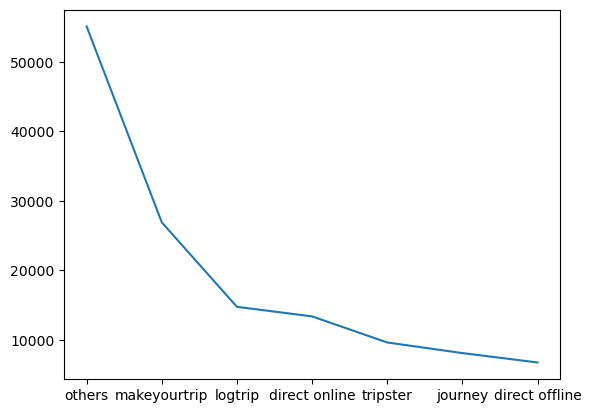

In [12]:
df_bookings.booking_platform.value_counts().plot()

<AxesSubplot:>

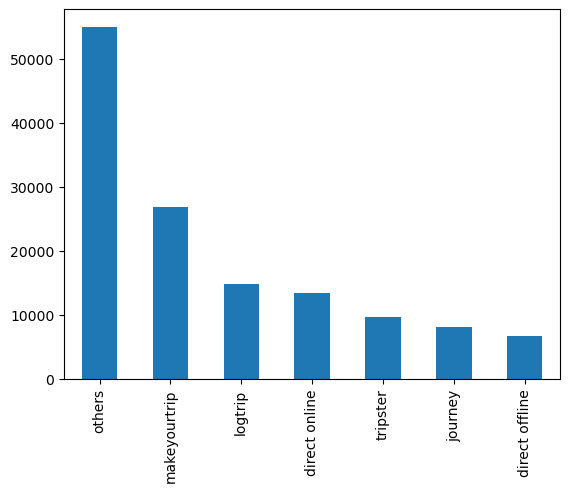

In [14]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

<AxesSubplot:>

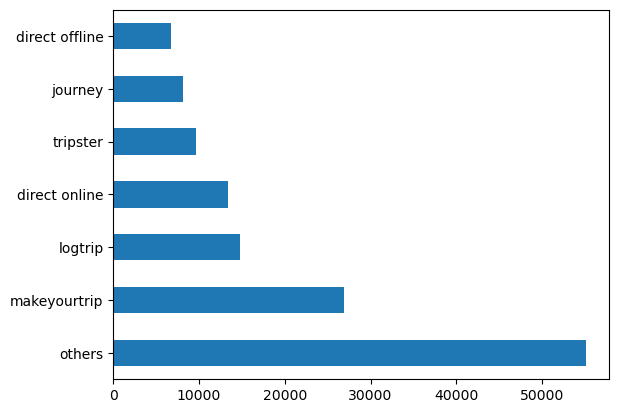

In [15]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

# Data Cleaning

In [16]:
df_bookings.describe(
)

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [17]:
df_bookings.revenue_generated.min()

6500

In [4]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")

In [19]:
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<AxesSubplot:>

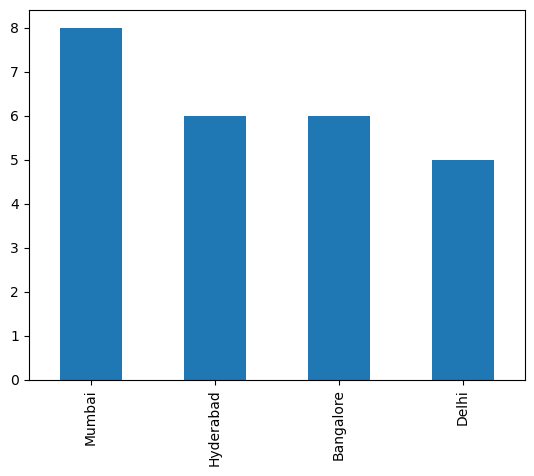

In [21]:
df_hotels.city.value_counts().plot(kind="bar")

In [29]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### (1)Clean Invalid Guests

In [31]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [32]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [34]:
df_bookings.shape

(134578, 12)

In [35]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [37]:

avg,std=df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()


In [38]:
avg, std

(15378.036937686695, 93040.15493143328)

In [40]:
higher_limit = avg + 3*std
lower_limit = avg - 3*std

In [41]:
higher_limit

294498.50173198653

In [42]:
lower_limit

-263742.4278566132

## (2)Outlier Removal in Revenue Generated

In [43]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [44]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]


In [46]:
df_bookings.shape

(134573, 12)

In [ ]:
df_bookings.isnull().sum()

# Data Transformation

### Create occupancy percentage column

In [50]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [5]:
 df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [6]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [7]:
 df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x: round(x*100,2))

In [8]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


# Insights Generation

## 1. What is the average occupancy rate in each of the room categories?

In [10]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [18]:
df=pd.merge(df_agg_bookings,df_rooms, left_on="room_category",right_on= "room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [19]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [20]:
df.drop("room_id" ,axis = 1,inplace = True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


## 2.Print average occupancy rate per city 

In [21]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [25]:
df = pd.merge(df,df_hotels, on = "property_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai


In [27]:
df.groupby("city_x")["occ_pct"].mean().round(2)

city_x
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='city_x'>

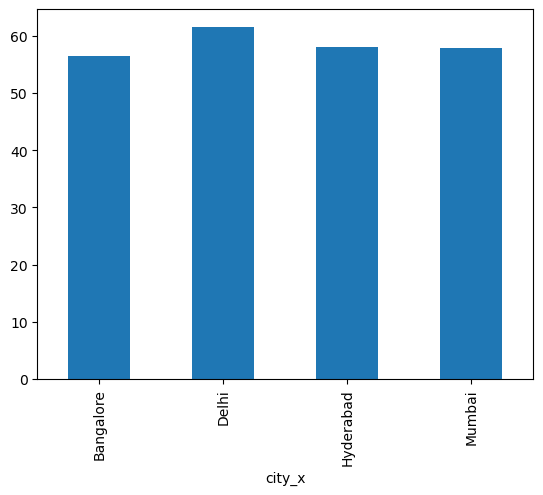

In [28]:
df.groupby("city_x")["occ_pct"].mean().round(2).plot(kind="bar")

## 3. When was the occupancy better ? Weekends or weekdays?

In [31]:
df = pd.merge(df,df_date, left_on="check_in_date",right_on="date")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [33]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

## 4. In the month of June, what is the occupancy for different cities? 

In [34]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [35]:
df_june = df[df["mmm yy"]=="Jun 22"]
df_june.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [36]:
df_june.groupby("city_x")["occ_pct"].mean().round(2)

city_x
Bangalore    56.58
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

df_june.groupby("city_x")["occ_pct"].mean().round(2).sort_values(ascending=False)

## 5. Add new data for august month .

In [38]:
df_aug = pd.read_csv("new_data_august.csv")

In [39]:
df_aug

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [40]:
df_aug.shape

(7, 13)

In [41]:
df.shape

(6500, 17)

In [42]:
latest_df =pd.concat([df,df_aug],ignore_index= True,axis=0)

In [43]:
latest-df

NameError: name 'latest' is not defined

In [45]:
latest_df.shape

(6507, 21)

## 6. Print revenue realized per city.


In [46]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [47]:
df_bookings_all = pd.merge(df_bookings,df_hotels, on = "property_id")
df_bookings_all

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760,Atliq Seasons,Business,Mumbai
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai


In [49]:
df_bookings_all.groupby("city")["revenue_realized"].sum().round(2)

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

## 7. Revenue Generated per month.

In [50]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [51]:
pd.merge(df_bookings_all,df_date,left_on = "check_in_date",right_on="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [53]:
df_date["date"]=pd.to_datetime(df_date["date"])

In [54]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [55]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [56]:
df_bookings_all["check_in_date"]=pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [57]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134587 non-null  float64       
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  property_name      134590 non-null  object        
 13  category           134590 non-null  object  

In [59]:
df_bookings_all = pd.merge(df_bookings_all,df_date,left_on = "check_in_date",right_on="date")

In [60]:
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [61]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    390005772
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

## 8. Print revenue realized per hotel type

In [62]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [63]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2)

property_name
Atliq Bay        179429321
Atliq Blu        179203544
Atliq City       196568883
Atliq Exotica    219076161
Atliq Grands     145860641
Atliq Palace     209474575
Atliq Seasons     45959517
Name: revenue_realized, dtype: int64

## 9.Print average rating per city

In [65]:
df_bookings_all.head(3)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [67]:
df_bookings_all.groupby("city")["ratings_given"].mean()

city
Bangalore    3.403911
Delhi        3.774979
Hyderabad    3.664286
Mumbai       3.644219
Name: ratings_given, dtype: float64

## 10. Print a pie chart of revenue realized per booking platform

In [68]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

booking_platform
direct offline     59298844
direct online     117257653
journey            71231599
logtrip           129075081
makeyourtrip      233132708
others            480711744
tripster           84865013
Name: revenue_realized, dtype: int64

<AxesSubplot:ylabel='revenue_realized'>

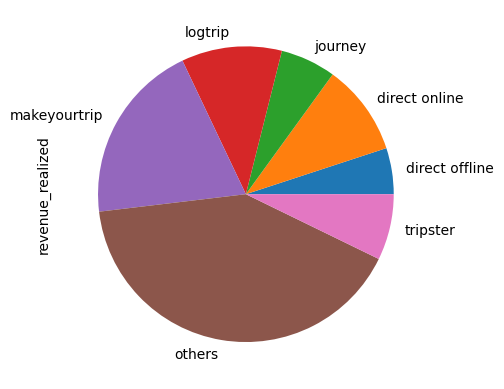

In [70]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")